In [1]:
from utils_04_06 import *

C:\Users\ms\Desktop\lane-detection\python\utils_31_05.py:183: RuntimeWarning: invalid value encountered in float_scalars
  tan = rad2deg(math.atan(-gx[y,x] / gy[y,x]))
C:\Users\ms\Desktop\lane-detection\python\utils_31_05.py:183: RuntimeWarning: divide by zero encountered in float_scalars
  tan = rad2deg(math.atan(-gx[y,x] / gy[y,x]))


[-30.835654596100284, 33.844011142061277]


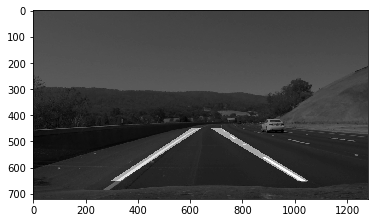

In [2]:
test = mpimg.imread('img/test3.jpg')
gray = rgb2gray(test)
img = test[470:650,:]

y, tan_arr, mag_arr = edf_comp(img)

edges, cvm = get_edges_thetas(y, tan_arr, mag_arr)
gray_lines, lbrois, ang_buf = draw_on_img(gray, edges, cvm, mag_arr, thicc=24)
#pickle.dump(ang_buf, open('default/ang_buf.p', 'wb'))

'''
import pickle

pickle.dump(lbrois, open('default/lb.p', 'wb'))
lbrois = pickle.load(open('default/lb.p', 'rb'))
'''

print(cvm)
aeim = get_new_angles_edges(test, lbrois, ang_buf)
#print(aeim[1])
gr, lbb, angs = lbroi_draw_on_img(gray, aeim)
ang_buf = angbuf(ang_buf, angs)
aeim1 = get_new_angles_edges(test, lbb, ang_buf)
gr1, lb1, angss = lbroi_draw_on_img(gray, aeim1)
ang_buf = angbuf(ang_buf, angss)
gshow(gr1)

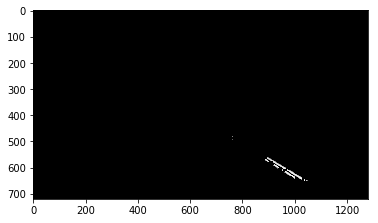

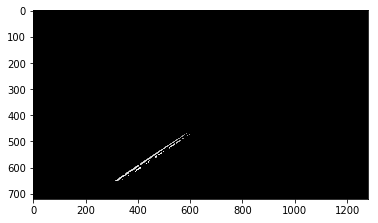

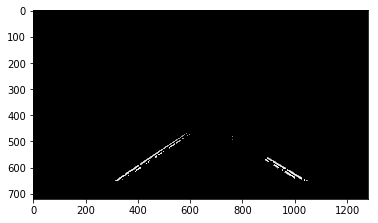

In [9]:
e1 = aeim1[0][1]
e2 = aeim1[1][1]
gshow(e1)
gshow(e2)
gshow(e1+e2)
e1 *= 255.0/np.max(e1)
e1 = e1.astype(np.uint8)
e2 *= 255.0/np.max(e2)
e2 = e2.astype(np.uint8)
e12 = (e1 + e2).astype(np.float32)
e12 *= 255.0/np.max(e12)
e12 = e12.astype(np.uint8)
plt.imsave(fname = 'resim/e1.jpg', arr = e1, cmap='gray')
plt.imsave(fname = 'resim/e2.jpg', arr = e2, cmap='gray')
plt.imsave(fname = 'resim/e12.jpg', arr = e12, cmap='gray')

In [11]:
plt.imsave(fname='resim/lbroi.png', arr=gray_lines, cmap='gray')

In [4]:
def edges_to_steer(edges):
    l = len(edges)
    
    for i in range(l):
        edge = edges[i]
        
        C = solver(edge)
        
        b = C[1]
        
        deg = rad2deg(math.atan(b))
        
        
x = np.linspace(-90,90,361)
np.where(x == 15.5)

(array([211], dtype=int64),)

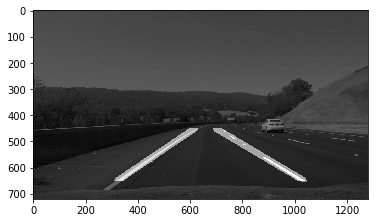

-31.0


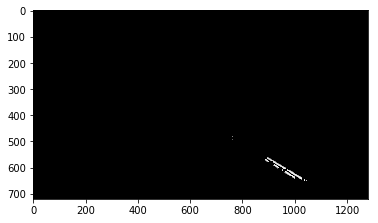

33.5


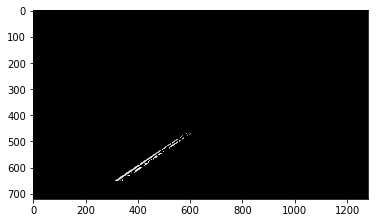

In [4]:
gshow(gray_lines)
for i in range(2):
    print(aeim[i][0])
    gshow(aeim[i][1])

In [5]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * X) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current, cost

In [2]:
def steer(aeim, show=False):
    edges = get_edges(aeim)
    if show:
        fig = plt.figure(figsize=(12,12))

        ax = plt.subplot(121)
        ax.set_title('Edge 0')
        ax.imshow(edges[0], cmap=plt.get_cmap('gray'))

        ax = plt.subplot(122)
        ax.set_title('Edge 1')
        ax.imshow(edges[1], cmap=plt.get_cmap('gray'))
        plt.show()

    
    
    
    
    parabolas, mid_y, mid_x = get_parabolas(edges)
    if show:
        
        fig = plt.figure(figsize=(12,12))

        ax = plt.subplot(121)
        ax.set_title('Parabola 0')
        ax.imshow(parabolas[0], cmap=plt.get_cmap('gray'))

        ax = plt.subplot(122)
        ax.set_title('Parabola 1')
        ax.imshow(parabolas[1], cmap=plt.get_cmap('gray'))
        plt.show()
    
    
    
    t = 0
    
    rm, rs, comp = crop_ipm(parabolas, dy=10)
    '''if show:
        fig = plt.figure(figsize=(12,12))

        ax = plt.subplot(131)
        ax.set_title('Remapped')
        ax.imshow(rm, cmap=plt.get_cmap('gray'))

        ax = plt.subplot(132)
        ax.set_title('Original')
        ax.imshow(comp, cmap=plt.get_cmap('gray'))

        ax = plt.subplot(133)
        ax.set_title('Resized')
        ax.imshow(rs, cmap=plt.get_cmap('gray'))
        plt.show()
    
    blank = np.zeros((720, 1280)).astype(np.uint8)
    fig, ax = plt.subplots()
    ax.imshow(blank, cmap=plt.get_cmap('gray'))
    ax.plot(mid_x[900:1300], mid_y[900:1300], 'w-', linewidth=3)
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    
    fig.canvas.draw()
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    d = data[49:238, 53:390] # crop plot
    plot_image = cv2.resize(d, (1280, 720)) # resize to original dims
    plot_image = rgb2gray(plot_image)
    plt.close(fig)
    
    if show:
        gshow(plot_image)
    #print(plot_image.shape)
    
    plot_image_rgb = color.gray2rgb(plot_image)
    rm1, rs1 = ipm(plot_image_rgb, dy=10)
    rm1[125:,:70] = 0
    #gshow(rm1)
    
    #gshow(rm + rm1)
    
    nz = np.transpose(np.nonzero(rm1))
    
    matx = np.hstack((np.ones_like(nz[:,0]).reshape((nz.shape[0], 1)), nz[:,0].reshape((nz.shape[0], 1))))
    #print(matx.shape)
    maty = nz[:,1].reshape((nz.shape[0], 1))
    #print(maty.shape)
    t = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(matx), matx)), np.transpose(matx)), maty)
    #print(t)'''
    return t, comp
    
    '''
    y, tan, mag = edf_comp(rm1, prefunc=False, sigma=15)
    ang = lbroi_get_maxima(y)
    
    print('angle:', ang)'''
    
    '''thetas = []
    for edge in e:
        C = solver(edge)
        b = C[1]
        tan_val = math.atan(b)
        thetas.append(tan_val)
    
    thetas.sort()
    
    thetas[0] += 90
    thetas[1] -= 90
    '''
    #return thetas

In [30]:
t, comp = steer(aeim)

(2, 1)
[[  1.14145627e+02]
 [ -7.73196236e-02]]
-4.4212914680347835
plotx.shape: (400, 1)


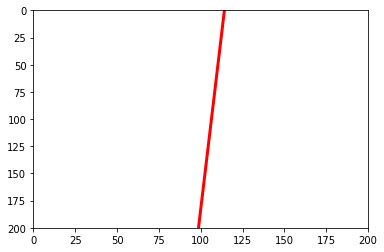

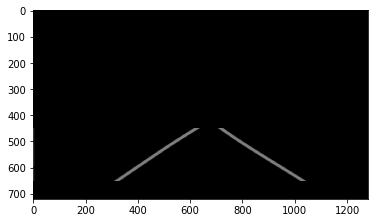

In [18]:
print(t.shape)
print(t)
print(math.atan(t[1]) * (180/math.pi))
ploty = np.linspace(0, 200, 400).reshape((400, 1))
ploty = np.hstack((np.ones_like(ploty), ploty))
plotx = np.matmul(ploty, t.reshape(2, 1))
print('plotx.shape:', plotx.shape)


plt.plot(list(np.ravel(plotx)), list(ploty[:, 1]), 'r-', linewidth=3)
plt.xlim(0, 200)
plt.ylim(200, 0)
plt.show()

gshow(comp)

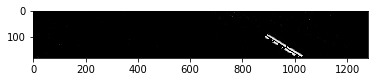

[[ 465.08665048]
 [   2.40842324]
 [   1.37456823]]
67.45131502896346


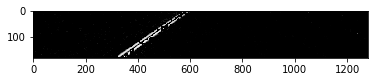

[[ 307.18948595]
 [  -0.59799885]
 [  -1.64480577]]
-30.879375022263492


In [10]:
edge = edges[1]
c = solver(edge)
for edge in edges:
    c = solver(edge)
    gshow(edge)
    print(c)
    b = c[1]
    deg = rad2deg(math.atan(b))
    print(deg)

In [4]:
ps = get_parabolas(edges, hist=False)

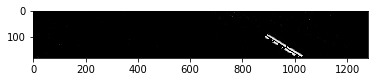

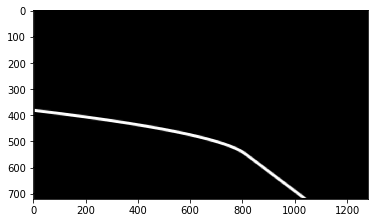

In [5]:
gshow(edges[0])
gshow(ps[0])

In [3]:
def logic(vid, def_lbrois, dbg=False):
    curr_lb = def_lbrois
    out_data = []
    
    if dbg:
        print('#frame:', vid.shape[0])
    for i in range(vid.shape[0]):
        frame = vid[i]
        gray = rgb2gray(frame)
        try:
            aeim = get_new_angles_edges(frame, curr_lb)
            new_lb = lbroi_draw_on_img(gray, aeim)
            t, comp = steer(aeim)
            
            data = (i, comp, -t[1])
            out_data.append(data)
            
            curr_lb = new_lb
            
            if dbg:
                print(i, 'first try')
        except:
            try:
                aeim = get_new_angles_edges(frame, def_lbrois)
                new_lb = lbroi_draw_on_img(gray, aeim)
                t, comp = steer(aeim)
                
                data = (i, comp, -t[1])
                out_data.append(data)
                
                curr_lb = new_lb
                if dbg:
                    print(i, 'second try')
                continue
            except:
                curr_lb = def_lbrois
                if dbg:
                    print(i, 'second except')
                continue
        
        # out_data[example] = (frame_no, frame_line_image, steer_angle)
        
    return out_data

In [4]:

#TODO: Create video from output of logic(), check other video generation function from CNN-side


def aaa(inpath, outpath):
    cap = cv2.VideoCapture(inpath)
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))
    
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(outpath, fourcc, 25.0, (1280, 720))
    
    fc = 0
    ret = True

    while (fc < frameCount  and ret):
        ret, frame = cap.read()
        
        # save_frame = do_something(frame)
        
        out.write(frame)
        fc += 1

    cap.release()
    
    return buf

In [14]:
inp = 'video_in/project_video.mp4'
outp = 'video_out/projct_video.mp4'

bf = vid2arr(inp, outp)

In [5]:
def vid2arr(inpath):
    cap = cv2.VideoCapture(inpath)
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))
    
    fc = 0
    ret = True

    while (fc < frameCount  and ret):
        ret, frame = cap.read()
        if ret is False:
            continue
        
        buf[fc] = frame
        fc += 1

    cap.release()
    
    return buf

In [6]:
def arr2vid(arr, outp):
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(outp, fourcc, 25.0, (1280, 720))
    
    for i in range(arr.shape[0]):
        out.write(arr[i])

In [36]:
pro_vid = vid2arr('video_in/project_video.mp4')

In [39]:
def_lbrois = pickle.load(open('default/lb.p', 'rb'))

In [55]:
print(pro_vid.shape)
outdata = logic(pro_vid, def_lbrois)
print(len(outdata))

(1260, 720, 1280, 3)


C:\Users\ms\Desktop\lane-detection\python\utils_01_06.py:41: RuntimeWarning: divide by zero encountered in float_scalars
  tan = rad2deg(math.atan(-gx[y,x] / gy[y,x]))
C:\Users\ms\Desktop\lane-detection\python\utils_01_06.py:41: RuntimeWarning: invalid value encountered in float_scalars
  tan = rad2deg(math.atan(-gx[y,x] / gy[y,x]))


KeyboardInterrupt: 

In [7]:
def saveframes(inpath):
    cap = cv2.VideoCapture(inpath)
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    fc = 0
    ret = True
    
    while (fc < frameCount  and ret):
        ret, frame = cap.read()
        if ret is False:
            continue
            
        name = 'proframe_imgs/' + str(fc) + '.jpg'
        misc.imsave(name, frame)
        fc += 1

    cap.release()

In [6]:
#saveframes('video_in/project_video.mp4')

C:\Users\ms\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  app.launch_new_instance()


In [4]:
def_aeim = pickle.load(open('default/aeim.p', 'rb'))
def_lbs = pickle.load(open('default/lb.p', 'rb'))
def_ang_buf = pickle.load(open('default/ang_buf.p', 'rb'))

curr_lb = copy.deepcopy(def_lbs)
curr_ang_buf = copy.deepcopy(def_ang_buf)
out_data = []

import time
t1 = time.time()

for i in range(1257):
    print(i)
    name = 'proframe_imgs/' + str(i) + '.jpg'
    frame = mpimg.imread(name)
    gray = rgb2gray(frame)
    try:
        aeim = get_new_angles_edges(frame, curr_lb, curr_ang_buf)
        _, new_lb, new_angs = lbroi_draw_on_img(gray, aeim)
        curr_ang_buf = angbuf(curr_ang_buf, new_angs)
        
        t, comp = steer(aeim)

        curr_lb = new_lb
    except:
        try:
            print('------------TRY2')
            aeim = get_new_angles_edges(frame, def_lbrois, def_ang_buf)
            _, new_lb, new_angs = lbroi_draw_on_img(gray, aeim)
            curr_ang_buf = angbuf(copy.deepcopy(def_ang_buf), new_angs)
            
            t, comp = steer(aeim)

            curr_lb = new_lb
            continue
        except:
            print('---------EXCEPT2')
            curr_lb = def_lbs
            curr_ang_buf = copy.deepcopy(def_ang_buf)
            continue
            
t2 = time.time()
print(t2-t1)

0
1
2
3
4
5
6


C:\Users\ms\Desktop\lane-detection\python\utils_01_06.py:41: RuntimeWarning: divide by zero encountered in float_scalars
  tan = rad2deg(math.atan(-gx[y,x] / gy[y,x]))


7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


C:\Users\ms\Desktop\lane-detection\python\utils_01_06.py:41: RuntimeWarning: invalid value encountered in float_scalars
  tan = rad2deg(math.atan(-gx[y,x] / gy[y,x]))


128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377


In [7]:
print(1257 / ((t2-t1) / 25))

20.87135361196034


In [4]:
def_aeim = pickle.load(open('default/aeim.p', 'rb'))
def_lbs = pickle.load(open('default/lb.p', 'rb'))
def_ang_buf = pickle.load(open('default/ang_buf.p', 'rb'))

curr_lb = copy.deepcopy(def_lbs)
curr_ang_buf = copy.deepcopy(def_ang_buf)
out_data = []



for i in range(1257):
    print(i)
    name = 'proframe_imgs/' + str(i) + '.jpg'
    frame = mpimg.imread(name)
    gray = rgb2gray(frame)
    try:
        aeim = get_new_angles_edges(frame, curr_lb, curr_ang_buf)
        _, new_lb, new_angs = lbroi_draw_on_img(gray, aeim)
        curr_ang_buf = angbuf(curr_ang_buf, new_angs)
        
        t, comp = steer(aeim)

        data = (i, comp, t[1])
        out_data.append(data)

        curr_lb = new_lb
    except:
        try:
            print('------------TRY2')
            aeim = get_new_angles_edges(frame, def_lbrois, def_ang_buf)
            _, new_lb, new_angs = lbroi_draw_on_img(gray, aeim)
            curr_ang_buf = angbuf(copy.deepcopy(def_ang_buf), new_angs)
            
            t, comp = steer(aeim)

            data = (i, comp, t[1])
            out_data.append(data)

            curr_lb = new_lb
            continue
        except:
            print('---------EXCEPT2')
            curr_lb = def_lbs
            curr_ang_buf = copy.deepcopy(def_ang_buf)
            continue

0
1
2
3
4
5
6


C:\Users\ms\Desktop\lane-detection\python\utils_01_06.py:41: RuntimeWarning: divide by zero encountered in float_scalars
  tan = rad2deg(math.atan(-gx[y,x] / gy[y,x]))


7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


C:\Users\ms\Desktop\lane-detection\python\utils_01_06.py:41: RuntimeWarning: invalid value encountered in float_scalars
  tan = rad2deg(math.atan(-gx[y,x] / gy[y,x]))


128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377


In [6]:
out1 = out_data[:300]
out2 = out_data[300:600]
out3 = out_data[600:900]
out4 = out_data[900:]

In [7]:
pickle.dump(out1, open('default/out1_lr4_buf4.p', 'wb'))

In [8]:
pickle.dump(out2, open('default/out2_lr4_buf4.p', 'wb'))

In [9]:
pickle.dump(out3, open('default/out3_lr4_buf4.p', 'wb'))

In [10]:
pickle.dump(out4, open('default/out4_lr4_buf4.p', 'wb'))

In [28]:
def_aeim = pickle.load(open('default/aeim.p', 'rb'))
def_lbs = pickle.load(open('default/lb.p', 'rb'))
def_ang_buf = pickle.load(open('default/ang_buf.p', 'rb'))

curr_lb = copy.deepcopy(def_lbs)
curr_ang_buf = copy.deepcopy(def_ang_buf)
out_data = []



for i in range(1257):
    print(i)
    name = 'proframe_imgs/' + str(i) + '.jpg'
    frame = mpimg.imread(name)
    gray = rgb2gray(frame)
    try:    
        if (i < 530 or i > 640):
            aeim = get_new_angles_edges(frame, curr_lb, curr_ang_buf)
            _, new_lb, new_angs = lbroi_draw_on_img(gray, aeim)
            curr_ang_buf = angbuf(curr_ang_buf, new_angs)

            t, comp = steer(aeim)

            data = (i, comp, t[1])
            out_data.append(data)

            curr_lb = new_lb
        else:
            aeim = get_new_angles_edges(frame, def_lbs, def_ang_buf)
            _, new_lb, new_angs = lbroi_draw_on_img(gray, aeim)
            curr_ang_buf = angbuf(copy.deepcopy(def_ang_buf), new_angs)
            
            t, comp = steer(aeim)

            data = (i, comp, t[1])
            out_data.append(data)

            curr_lb = new_lb
            continue
    except:   
        try:
            print('------------TRY2')
            aeim = get_new_angles_edges(frame, def_lbs, def_ang_buf)
            _, new_lb, new_angs = lbroi_draw_on_img(gray, aeim)
            curr_ang_buf = angbuf(copy.deepcopy(def_ang_buf), new_angs)
            
            t, comp = steer(aeim)

            data = (i, comp, t[1])
            out_data.append(data)

            curr_lb = new_lb
            continue
        except:
            print('---------EXCEPT2')
            curr_lb = def_lbs
            curr_ang_buf = copy.deepcopy(def_ang_buf)
            continue

0
1
2
3
4
5
6


C:\Users\ms\Desktop\lane-detection\python\utils_01_06.py:41: RuntimeWarning: divide by zero encountered in float_scalars
  tan = rad2deg(math.atan(-gx[y,x] / gy[y,x]))


7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


C:\Users\ms\Desktop\lane-detection\python\utils_01_06.py:41: RuntimeWarning: invalid value encountered in float_scalars
  tan = rad2deg(math.atan(-gx[y,x] / gy[y,x]))


128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377


In [2]:
from collections import deque
# 996, 1012, 1044
a = [deque([]), deque([])]
print(a)

[deque([]), deque([])]


In [31]:
out1 = out_data[:300]
out2 = out_data[300:600]
out3 = out_data[600:900]
out4 = out_data[900:]

In [33]:
pickle.dump(out1, open('default/gg/out1.p', 'wb'))
pickle.dump(out2, open('default/gg/out2.p', 'wb'))
pickle.dump(out3, open('default/gg/out3.p', 'wb'))
pickle.dump(out4, open('default/gg/out4.p', 'wb'))

In [26]:
print(len(out_data))
p165 = out_data[600:]
pickle.dump(p165, open('default/test23/p165.p', 'wb'))

765


In [13]:
len(a)

2

In [7]:
aa = pickle.load(open('default/ang_buf.p', 'rb'))

In [11]:
o = copy.deepcopy(aa)
o[0].append(15)

In [12]:
print(aa)
print(o)

[deque([-30.835654596100284, 15]), deque([33.844011142061277])]
[deque([-30.835654596100284, 15, 15]), deque([33.844011142061277])]
